# Appling machine learning to audio analysis

First we want to upload our labeled and unlabeled dataset for future use to train our model

In [1]:
### Dependencies were already installed previously on ubuntu
### Comet: experiment tracking and visual tools

from comet_ml import Experiment

import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa # audio analysis
import librosa.display # this submodule needs to be imported explicitly
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import os

In [2]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
# Sequential: creates a sequential model, ideal to create plain stack of layers
# each layer has exactly one input tensor and one output tensor

# Layers: basic building blacks of neural networks in Keras, consists of a
# tensor-in and tensor-out computation function and some state

# Dense, Dropout and Activartion are classes from layers:
# Activation and dense: Core layers. Activation applies an activation function
# to an output. The output has the same shape as the input.
# Dropout: regularization layer.

# Adam: it's an algorithm, an optimization, stochastic gradient descent method
#based on adaptive estimation of first and second order moments.

# to_categorical: converts a class vectors (integers) to a binary class matrix


In [4]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
# Keras now is fully integrated to Tensorflow, so to_categorical and Adam
# can't be imported directly from keras, therefore, the update:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

2021-12-16 17:08:55.965286: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-16 17:08:55.965354: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
# To play audio file:
import IPython.display as ipd

In [6]:
# Create a Comet Experiment, to capture any and all artifacts
# such as audio files, visualization, model, dataset, system information and training metrics
experiment = Experiment(api_key = "Xa6eGiuYFngDcAJ9PVY1WpZp0", project_name = "SetA")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/negromontebs/seta/48eb54fc56fa4d88a6b8c3798c1f2717



In [15]:
# Load dataset
df = pd.read_csv('../csvFiles/set_a.csv')


# Create a list of the labels. Currently there are 5 labels: 'artifact', 'extrahls', 'murmur', 'normal', 'unlab'
labels = list(df['label'].unique())
print(labels)

['artifact', 'extrahls', 'murmur', 'normal', 'unlab']


In [19]:
# grabs a single audio file from each class
files = dict()
datasetSize = 1

#Iteration over the labels and 

for i in range(len(labels)):
    
    #if the dataset contains itens with  the iterated label
    labelBoolean = (df['label'] == labels[i])
    #pick those items and make a new dataFrame with a spefic size
    dfItem = df[labelBoolean][:datasetSize]
    #reset the index to for easier selection
    tmp = dfItem.reset_index()
    #string with the directory
    path = '{}'.format(tmp['fname'][0])
    #save the string to the dictionary
    print(path)
    files[labels[i]] = '../' + path


set_a/artifact__201012172012.wav
set_a/extrahls__201101070953.wav
set_a/murmur__201101051104.wav
set_a/normal__201101070538.wav
set_a/Aunlabelledtest__201012172010.wav


../set_a/artifact__201012172012.wav
../set_a/extrahls__201101070953.wav
../set_a/murmur__201101051104.wav
../set_a/normal__201101070538.wav
../set_a/Aunlabelledtest__201012172010.wav


{'web': 'https://www.comet.ml/api/image/download?imageId=a390dd02d8174c50ab9bf784a88e8a9e&experimentKey=48eb54fc56fa4d88a6b8c3798c1f2717',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=a390dd02d8174c50ab9bf784a88e8a9e&experimentKey=48eb54fc56fa4d88a6b8c3798c1f2717',
 'imageId': 'a390dd02d8174c50ab9bf784a88e8a9e'}

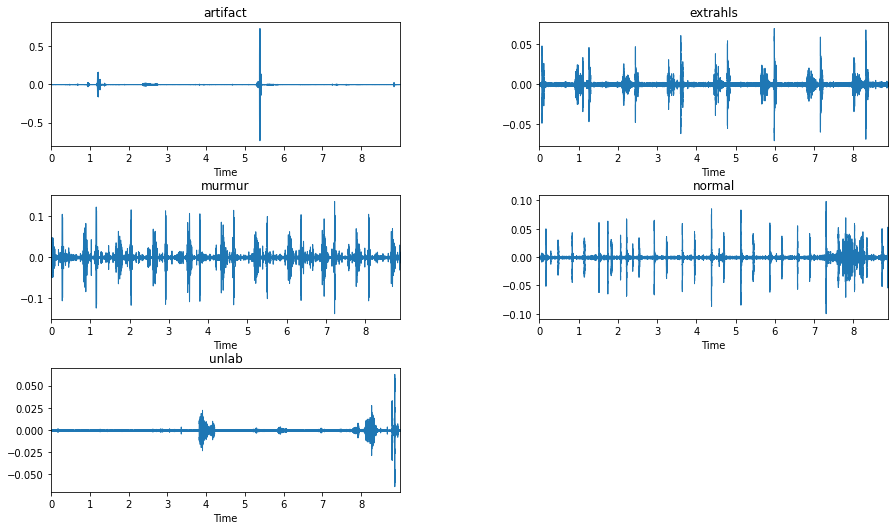

In [20]:
# To plot the waveforms, using librosa's display.waveplot function:

fig = plt.figure(figsize=(15,15))
#experiment.log_image('label_examples.png')
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)


for i, lab in enumerate(labels):
    # i = index
    # lab = name of the label at current index
    fn = files[lab]
    print(fn)
    fig.add_subplot(5,2,1+i)
    plt.title(lab)
    data, sample_rate = librosa.load(fn)
    librosa.display.waveplot(data, sr = sample_rate)
    
plt.savefig('../images/label_examples.png')

# Log graphic of waveforms to comet:
experiment.log_image('../images/label_examples.png')

In [21]:
# Log audio files to Comet for debugging
for label in labels:
    fn = files[label]
    experiment.log_audio(fn, metadata = {'name': label})

## Preprocessing

In [22]:
#pick an audio file
fn = files["artifact"]
#get its sample rate and librosa sample rate and bit depth
librosa_audio, librosa_sample_rate = librosa.load(fn)
scipy_sample_rate, scipy_audio = wav.read(fn)

print("Original sample rate: {}".format(scipy_sample_rate))
print("Librosa sample rate: {}".format(librosa_sample_rate))

print('Original audio file min~max range: {} to {}'.format(np.min(scipy_audio), np.max(scipy_audio)))
print('Librosa audio file min~max range: {0:.2f} to {0:.2f}'.format(np.min(librosa_audio), np.max(librosa_audio)))

Original sample rate: 44100
Librosa sample rate: 22050
Original audio file min~max range: -23887 to 23072
Librosa audio file min~max range: -0.73 to -0.73


{'web': 'https://www.comet.ml/api/image/download?imageId=4ddef9653a32419ea00c6fbb3d117180&experimentKey=48eb54fc56fa4d88a6b8c3798c1f2717',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=4ddef9653a32419ea00c6fbb3d117180&experimentKey=48eb54fc56fa4d88a6b8c3798c1f2717',
 'imageId': '4ddef9653a32419ea00c6fbb3d117180'}

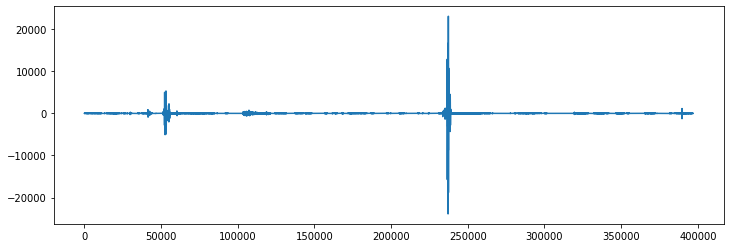

In [24]:
#plot the original audio
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)
plt.savefig('../images/original_audio.png')
experiment.log_image('../images/original_audio.png')

{'web': 'https://www.comet.ml/api/image/download?imageId=6230ac22baa843b084f4656ed9a460a2&experimentKey=48eb54fc56fa4d88a6b8c3798c1f2717',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=6230ac22baa843b084f4656ed9a460a2&experimentKey=48eb54fc56fa4d88a6b8c3798c1f2717',
 'imageId': '6230ac22baa843b084f4656ed9a460a2'}

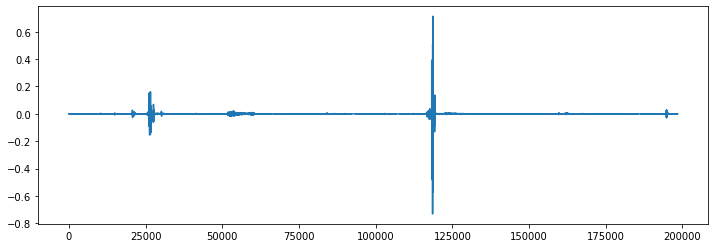

In [25]:
# plot the librosa audio mono sound
plt.figure(figsize=(12,4))
plt.plot(librosa_audio)
plt.savefig('../images/librosa_audio.png')
experiment.log_image('../images/librosa_audio.png')

<h2> Separating S1 and S2

In [14]:
timing = pd.read_csv('set_a_timing.csv')

In [15]:
S1 = dict()
S2 = dict()

file_name = list(timing['fname'].unique())

for i in file_name:
    S1[i] = []
    S2[i] = []

for i in range(len(timing)):
    if timing.sound[i] == 'S1':
        S1[timing.fname[i]].append(timing.loc[i,'location'])
    else:
        S2[timing.fname[i]].append(timing.loc[i,'location'])
        

In [16]:
# function to track time and beats from every audio
def extract_beat(file_name):
    audio, sample_rate = librosa.load(file_name) 
    # tracks the beats using time series input
    tempo, beats = librosa.beat.beat_track(audio, sr=sample_rate)
    return tempo, beats

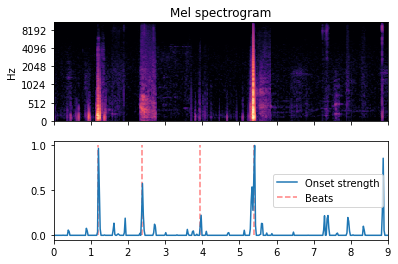

In [17]:
# plots the mel spectogram of one audio
hop_length = 512
tempo, beats = librosa.beat.beat_track(librosa_audio, sr=librosa_sample_rate)
onset_env = librosa.onset.onset_strength(librosa_audio, sr=librosa_sample_rate, aggregate=np.median)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(onset_env, sr=librosa_sample_rate, hop_length=hop_length)
M = librosa.feature.melspectrogram(librosa_audio, sr=librosa_sample_rate, hop_length=hop_length)
librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length,
                         ax=ax[0])
ax[0].label_outer()
ax[0].set(title='Mel spectrogram')
ax[1].plot(times, librosa.util.normalize(onset_env), label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
ax[1].legend()

In [18]:
# list for the beats, time, label
beats = [] 
time = []
labels = []

In [19]:
# Iterate through each sound file and extract the beats 
for index, row in df.iterrows():
    
    absolutePath = os.path.abspath("")
    fname = str(row["fname"])
    file_name = os.path.join(absolutePath,fname)
    
    class_label = row["label"]
    
    if(class_label != "unlab"):
        data = extract_beat(file_name)
        time.append(data[0])
        beats.append(data[1])
        labels.append(class_label)
    
# Convert into a Panda dataframe
tb_df = pd.DataFrame(list(zip(beats, time, labels)), columns=['beats','time','class_label'])

In [20]:
tb_df

,beats,time,class_label
0,"[52, 103, 170, 232]",50.666360,artifact
1,"[159, 185]",99.384014,artifact
2,"[49, 73, 92, 114, 135, 156, 176, 196, 216, 238...",112.347147,artifact
3,"[19, 44, 69, 93, 117, 143, 166, 191, 216, 239,...",103.359375,artifact
4,"[60, 81, 100, 120, 140, 160, 181, 201, 220, 24...",123.046875,artifact
...,...,...,...
119,"[40, 76, 110, 145, 182, 219, 255, 290]",71.777344,normal
120,[],0.000000,normal
121,[],0.000000,normal
122,[],0.000000,normal


## MFCCs - Mel-Frequency Cepstrum Coefficients

### Extract coefficients from only one file

In [26]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc = 40)
print(mfccs.shape)

(40, 388)


{'web': 'https://www.comet.ml/api/image/download?imageId=8406f4795f8b4cdb8d5152906a16279c&experimentKey=48eb54fc56fa4d88a6b8c3798c1f2717',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=8406f4795f8b4cdb8d5152906a16279c&experimentKey=48eb54fc56fa4d88a6b8c3798c1f2717',
 'imageId': '8406f4795f8b4cdb8d5152906a16279c'}

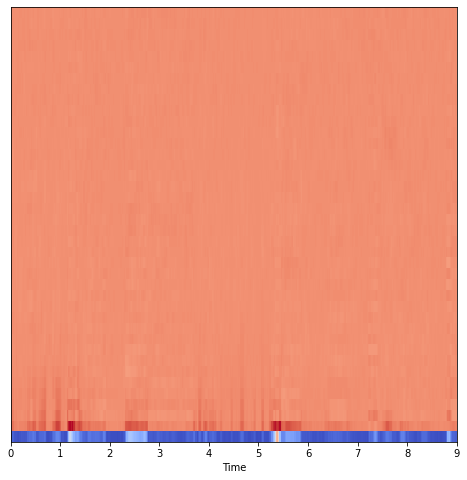

In [27]:
plt.figure(figsize=(8,8))
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')
plt.savefig('../images/MFCCs.png')
experiment.log_image('../images/MFCCs.png')

### Function to extract the MFCCs from every file in our dataset

In [28]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
     
    return mfccs_processed

In [35]:
features = []# Iterate through each sound file and extract the features 

for index, row in df.iterrows():
    
    absolutePath = os.path.abspath("../")
    fname = str(row["fname"])
    file_name = os.path.join(absolutePath,fname)
    
    class_label = row["label"]
    
    if(class_label != "unlab"):
        data = extract_features(file_name)
        features.append([data, class_label])
    
# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

In [36]:
featuresdf.head()

,feature,class_label
0,"[-594.53345, 39.48496, 4.773615, 6.360032, 2.7...",artifact
1,"[-756.76984, 38.06422, -12.761636, 5.586702, -...",artifact
2,"[-568.246, 48.002598, -25.640783, 8.441813, -2...",artifact
3,"[-299.85703, 112.79045, -22.194496, 28.633465,...",artifact
4,"[-296.34073, 102.59627, -18.80507, 15.606756, ...",artifact


In [37]:
featuresdf.iloc[0]['feature']

array([-5.9453345e+02,  3.9484959e+01,  4.7736149e+00,  6.3600321e+00,
        2.7210441e+00,  1.9556358e+00, -1.5586532e+00, -1.5916940e+00,
       -4.1285987e+00, -9.4592869e-01, -2.9675467e+00, -2.1387017e+00,
       -3.4743207e+00, -1.7667232e+00, -2.4402936e+00, -1.8360806e+00,
       -2.1535695e+00, -1.2188101e+00, -1.6877983e+00, -1.3186961e+00,
       -1.6294661e+00, -1.5636450e+00, -1.0807190e+00, -1.5055786e+00,
       -9.3540710e-01, -9.4582045e-01, -6.7552823e-01, -4.6510810e-01,
       -5.9152031e-01, -6.3035971e-01, -3.6442605e-01, -2.2027926e-01,
       -5.5047251e-02,  1.7959123e-02, -7.3863313e-02, -2.9855010e-01,
        4.0030742e-01,  3.0644944e-01,  2.5131455e-01,  2.2699493e-01],
      dtype=float32)

## Model building and training

In [38]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

### Trainning and test sets

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 127)

### Neural Network architecture

In [44]:
num_labels = yy.shape[1]

filter_size = 2

def build_model_graph(input_shape=(40,)):
    model = Sequential()
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    # Compile the model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
    
    return model

model = build_model_graph()

# Display model architecture summary 
model(x_train)
model.summary()# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (99, 256)                 10496     
                                                                 
 activation_6 (Activation)   (99, 256)                 0         
                                                                 
 dropout_4 (Dropout)         (99, 256)                 0         
                                                                 
 dense_7 (Dense)             (99, 256)                 65792     
                                                                 
 activation_7 (Activation)   (99, 256)                 0         
                                                                 
 dropout_5 (Dropout)         (99, 256)                 0         
                                                                 
 dense_8 (Dense)             (99, 4)                  

### Model Trainning

In [42]:
num_epochs = 100
num_batch_size = 32
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), verbose=1)

# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE


Epoch 1/100


COMET INFO: ignoring tensorflow summary log of metrics because of keras; set `comet_ml.loggers.tensorboard_logger.LOG_METRICS = True` to override


4/4 [==============================] - 2s 68ms/step - loss: 53.6957 - accuracy: 0.1919 - val_loss: 7.3361 - val_accuracy: 0.2800
Epoch 2/100
4/4 [==============================] - 0s 49ms/step - loss: 31.9391 - accuracy: 0.2626 - val_loss: 25.0511 - val_accuracy: 0.2800
Epoch 3/100
4/4 [==============================] - 0s 54ms/step - loss: 36.3698 - accuracy: 0.3131 - val_loss: 21.2434 - val_accuracy: 0.3200
Epoch 4/100
4/4 [==============================] - 0s 57ms/step - loss: 26.7843 - accuracy: 0.3333 - val_loss: 12.6938 - val_accuracy: 0.4000
Epoch 5/100
4/4 [==============================] - 0s 41ms/step - loss: 24.9383 - accuracy: 0.2828 - val_loss: 9.7782 - val_accuracy: 0.5200
Epoch 6/100
4/4 [==============================] - 0s 40ms/step - loss: 28.4626 - accuracy: 0.3535 - val_loss: 11.6266 - val_accuracy: 0.5200
Epoch 7/100
4/4 [==============================] - 0s 43ms/step - loss: 22.1603 - accuracy: 0.4545 - val_loss: 10.1840 - val_accuracy: 0.5600
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 45ms/step - loss: 3.0792 - accuracy: 0.5758 - val_loss: 1.3785 - val_accuracy: 0.4800
Epoch 59/100
4/4 [==============================] - 0s 44ms/step - loss: 3.1647 - accuracy: 0.5758 - val_loss: 1.3705 - val_accuracy: 0.3600
Epoch 60/100
4/4 [==============================] - 0s 30ms/step - loss: 3.9640 - accuracy: 0.4646 - val_loss: 1.3572 - val_accuracy: 0.4000
Epoch 61/100
4/4 [==============================] - 0s 34ms/step - loss: 3.5436 - accuracy: 0.5253 - val_loss: 1.2067 - val_accuracy: 0.4400
Epoch 62/100
4/4 [==============================] - 0s 33ms/step - loss: 3.5329 - accuracy: 0.5152 - val_loss: 1.0557 - val_accuracy: 0.5200
Epoch 63/100
4/4 [==============================] - 0s 51ms/step - loss: 2.9556 - accuracy: 0.5758 - val_loss: 0.9522 - val_accuracy: 0.6800
Epoch 64/100
4/4 [==============================] - 0s 40ms/step - loss: 3.3659 - accuracy: 0.4949 - val_loss: 0.8799 - val_accuracy: 0.6000
Epoch 65/100
4/4 [========

In [43]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/negromontebs/seta/48eb54fc56fa4d88a6b8c3798c1f2717
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     accuracy [100]                : (0.19191919267177582, 0.7070707082748413)
COMET INFO:     batch_accuracy [100]          : (0.15625, 0.75)
COMET INFO:     batch_loss [100]              : (0.8577468991279602, 52.19437789916992)
COMET INFO:     epoch_duration [100]          : (0.09401293900009478, 1.4983039710000412)
COMET INFO:     loss [100]                    : (1.2669384479522705, 53.695735931396484)
COMET INFO:     val_accuracy [100]            : (0.2800000011920929, 0.7599999904632568)
COMET INFO:     val_loss [100]                : (0.7783566117286682, 25.05113983154297)
COMET INFO:     validate_batch_accuracy [100] : (0.280000001192092